In [1]:
%matplotlib inline
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

資料來源:https://data.gov.tw/dataset/8984
----

In [2]:
df = pd.read_excel("stock.xlsx")
df.head()

,年月,上市股票-平均每股市值(元),上市股票-平均每股盈餘(元),上市股票-平均每股淨值(元),上市股票-本益比(),上市股票-成交值週轉率(％),上市股票-市值占 GDP比率(％)
0,9201,23.34,0.44,14.98,52.83,20.51,103.32
1,9202,20.68,0.43,15.00,48.46,10.63,91.40
2,9203,20.16,0.42,14.99,47.81,10.80,89.15
3,9204,19.43,0.47,15.21,41.47,13.90,93.29
4,9205,21.29,0.60,15.51,35.64,10.58,102.37


In [3]:
#檢查資料是否有缺失
df.isnull().any()

年月                   False
上市股票-平均每股市值(元)       False
上市股票-平均每股盈餘(元)       False
上市股票-平均每股淨值(元)       False
上市股票-本益比()           False
上市股票-成交值週轉率(％)       False
上市股票-市值占 GDP比率(％)    False
dtype: bool

In [4]:
market_values = np.array(df["上市股票-平均每股市值(元)"])
profit = np.array(df["上市股票-平均每股盈餘(元)"])
net_values = np.array(df["上市股票-平均每股淨值(元)"])
turnover_rate = np.array(df["上市股票-成交值週轉率(％)"])
GDP_ratio = np.array(df["上市股票-市值占 GDP比率(％)"])
PE_ratio = np.array(df["上市股票-本益比()"])

In [5]:
market_values = market_values.reshape(len(market_values),1)
profit = profit.reshape(len(profit),1)
net_values = net_values.reshape(len(net_values),1)
turnover_rate = turnover_rate.reshape(len(turnover_rate),1)
GDP_ratio = GDP_ratio.reshape(len(GDP_ratio),1)
PE_ratio = PE_ratio.reshape(len(PE_ratio),1)

In [6]:
#將所有特徵合併
Data = np.concatenate((market_values,profit,net_values,turnover_rate,GDP_ratio),axis=1)

In [7]:
X = Data
Y = PE_ratio
#產生訓練以及測試資料
x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size = 0.3,random_state = 200)

In [8]:
#產生模型
model = LinearRegression()
model.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [9]:
#設定 X坐標範圍
xlabel = np.linspace(92,108+2/12,194) 

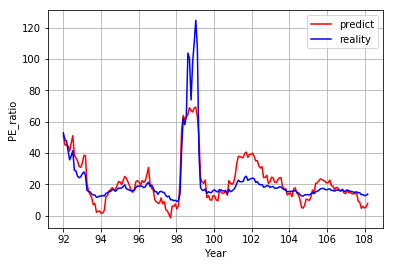

In [10]:
#將預測結果與實際結果做對照
Y_pred = model.predict(X) 
plt.plot(xlabel,Y_pred,'r')
plt.plot(xlabel,Y,'b')
plt.xlabel("Year")
plt.ylabel("PE_ratio")
plt.legend(["predict","reality"])
plt.grid()

In [11]:
#預測分數
model.score(x_test,y_test)

0.7472329569733216

結論
=====
影響股市的因素實際很多，因此實際的趨勢應該是無法單純以線性迴歸推測出其趨勢
----